In [77]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import re
import html5lib
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
import seaborn as sb
from sklearn import linear_model
import matplotlib.pyplot as plt
import sklearn as sk
pd.set_option('display.max_columns', None)

In [78]:
# Micheal Jordan Regular Season Data

r = requests.get("http://www.basketball-reference.com/players/j/jordami01.html")

soup = BeautifulSoup( r.content, 'html.parser' )

data = []

tbl = soup.find( "tbody")

rows = tbl.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols])
    
df_mj = pd.DataFrame(data)

# Drop empty rows, where Jordan was retired for
df_mj = df_mj.drop([9,14,15,16])
df_mj = df_mj.reset_index(drop=True)

df_mj.columns = ['age','team','league','pos','G','GS','MP','FG','FGA','FG_Percent','Three_Point','Three_Point_Attempts','Three_Point_Percent', 'Two_Point', 'Two_Point_Attempt', 'Two_Point_Percent','eFG_Percent','FT',
               'FTA','FT_Percent','ORB','DRB','TRB','AST','STL', 'BLK','TOV','PF','PTS']

df_mj.drop(['league','pos'], axis=1)

df_mj['season'] = df_mj.index+1
df_mj = df_mj.apply(pd.to_numeric, errors='ignore')

df_mj


,age,team,league,pos,G,GS,MP,FG,FGA,FG_Percent,Three_Point,Three_Point_Attempts,Three_Point_Percent,Two_Point,Two_Point_Attempt,Two_Point_Percent,eFG_Percent,FT,FTA,FT_Percent,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,21,CHI,NBA,SG,82,82,38.3,10.2,19.8,0.515,0.1,0.6,0.173,10.1,19.2,0.526,0.518,7.7,9.1,0.845,2.0,4.5,6.5,5.9,2.4,0.8,3.5,3.5,28.2,1
1,22,CHI,NBA,SG,18,7,25.1,8.3,18.2,0.457,0.2,1.0,0.167,8.2,17.2,0.474,0.462,5.8,6.9,0.840,1.3,2.3,3.6,2.9,2.1,1.2,2.5,2.6,22.7,2
2,23,CHI,NBA,SG,82,82,40.0,13.4,27.8,0.482,0.1,0.8,0.182,13.2,27.0,0.491,0.484,10.2,11.9,0.857,2.0,3.2,5.2,4.6,2.9,1.5,3.3,2.9,37.1,3
3,24,CHI,NBA,SG,82,82,40.4,13.0,24.4,0.535,0.1,0.6,0.132,13.0,23.7,0.546,0.537,8.8,10.5,0.841,1.7,3.8,5.5,5.9,3.2,1.6,3.1,3.3,35.0,4
4,25,CHI,NBA,SG,81,81,40.2,11.9,22.2,0.538,0.3,1.2,0.276,11.6,21.0,0.553,0.546,8.3,9.8,0.850,1.8,6.2,8.0,8.0,2.9,0.8,3.6,3.0,32.5,5
5,26,CHI,NBA,SG,82,82,39.0,12.6,24.0,0.526,1.1,3.0,0.376,11.5,21.0,0.548,0.550,7.2,8.5,0.848,1.7,5.1,6.9,6.3,2.8,0.7,3.0,2.9,33.6,6
6,27,CHI,NBA,SG,82,82,37.0,12.1,22.4,0.539,0.4,1.1,0.312,11.7,21.3,0.551,0.547,7.0,8.2,0.851,1.4,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5,7
7,28,CHI,NBA,SG,80,80,38.8,11.8,22.7,0.519,0.3,1.3,0.270,11.5,21.5,0.533,0.526,6.1,7.4,0.832,1.1,5.3,6.4,6.1,2.3,0.9,2.5,2.5,30.1,8
8,29,CHI,NBA,SG,78,78,39.3,12.7,25.7,0.495,1.0,2.9,0.352,11.7,22.7,0.514,0.515,6.1,7.3,0.837,1.7,5.0,6.7,5.5,2.8,0.8,2.7,2.4,32.6,9
9,31,CHI,NBA,SG,17,17,39.3,9.8,23.8,0.411,0.9,1.9,0.500,8.8,21.9,0.403,0.431,6.4,8.0,0.801,1.5,5.4,6.9,5.3,1.8,0.8,2.1,2.8,26.9,10


In [79]:
# Lebron James Regular Season Data

r = requests.get("http://www.basketball-reference.com/players/j/jamesle01.html")

soup = BeautifulSoup( r.content, 'html.parser' )

data = []

tbl = soup.find( "tbody")

rows = tbl.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols])
    
df_lj = pd.DataFrame(data)


df_lj.columns = ['age','team','league','pos','G','GS','MP','FG','FGA','FG_Percent','Three_Point','Three_Point_Attempts','Three_Point_Percent', 'Two_Point', 'Two_Point_Attempt', 'Two_Point_Percent','eFG_Percent','FT',
               'FTA','FT_Percent','ORB','DRB','TRB','AST','STL', 'BLK','TOV','PF','PTS']

df_lj.drop(['league','pos'], axis=1)


df_lj['season'] = df_lj.index+1

df_lj = df_lj.apply(pd.to_numeric, errors='ignore')
df_lj



,age,team,league,pos,G,GS,MP,FG,FGA,FG_Percent,Three_Point,Three_Point_Attempts,Three_Point_Percent,Two_Point,Two_Point_Attempt,Two_Point_Percent,eFG_Percent,FT,FTA,FT_Percent,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,0.417,0.8,2.7,0.290,7.1,16.1,0.438,0.438,4.4,5.8,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,1
1,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,0.472,1.4,3.9,0.351,8.6,17.2,0.499,0.504,6.0,8.0,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,2
2,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,0.480,1.6,4.8,0.335,9.5,18.3,0.518,0.515,7.6,10.3,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,3
3,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,0.476,1.3,4.0,0.319,8.6,16.8,0.513,0.507,6.3,9.0,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,4
4,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,0.484,1.5,4.8,0.315,9.1,17.1,0.531,0.518,7.3,10.3,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,5
5,24,CLE,NBA,SF,81,81,37.7,9.7,19.9,0.489,1.6,4.7,0.344,8.1,15.2,0.535,0.530,7.3,9.4,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4,6
6,25,CLE,NBA,SF,76,76,39.0,10.1,20.1,0.503,1.7,5.1,0.333,8.4,15.0,0.560,0.545,7.8,10.2,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7,7
7,26,MIA,NBA,SF,79,79,38.8,9.6,18.8,0.510,1.2,3.5,0.330,8.4,15.3,0.552,0.541,6.4,8.4,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7,8
8,27,MIA,NBA,SF,62,62,37.5,10.0,18.9,0.531,0.9,2.4,0.362,9.1,16.5,0.556,0.554,6.2,8.1,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1,9
9,28,MIA,NBA,PF,76,76,37.9,10.1,17.8,0.565,1.4,3.3,0.406,8.7,14.5,0.602,0.603,5.3,7.0,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8,10


## In the next comparisons, Lebron is representing by blue marks and Jordan by red

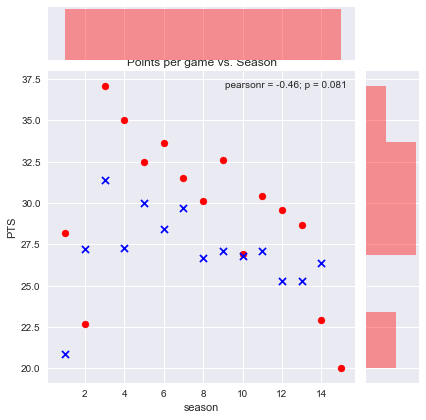

In [80]:
#Graphing Comparisons

#Points per Game
plt.gcf().clear()
graph = sb.jointplot(x=df_mj.season, y=df_mj.PTS, color='r')
graph.x = df_lj.season
graph.y = df_lj.PTS
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Points per game vs. Season")
plt.show()
plt.gcf().clear()



### Jordan beats Lebron in points per game

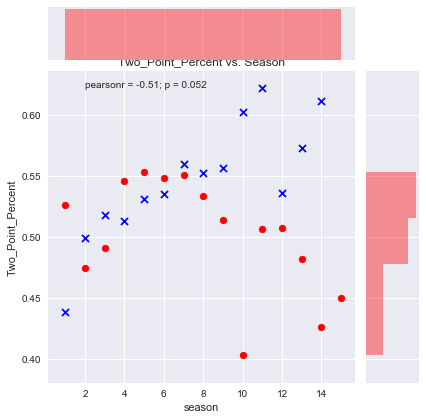

In [81]:
#2-point field goal percentage per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.Two_Point_Percent, color='r')
graph.x = df_lj.season
graph.y = df_lj.Two_Point_Percent
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Two_Point_Percent vs. Season")
plt.show()
plt.gcf().clear()


### Lebron beats Jordan in 2-PT % per game

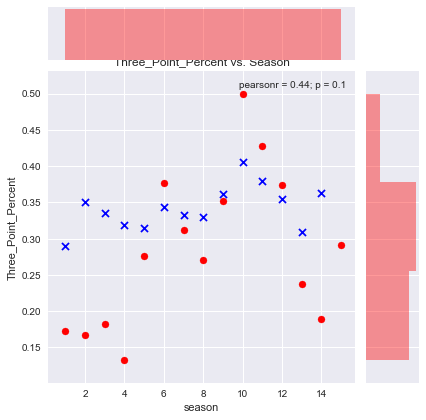

In [82]:
#3-point field goals percentage per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.Three_Point_Percent, color='r')
graph.x = df_lj.season
graph.y = df_lj.Three_Point_Percent
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Three_Point_Percent vs. Season")
plt.show()
plt.gcf().clear()

### Lebron beats Jordan in 3-PT % per game

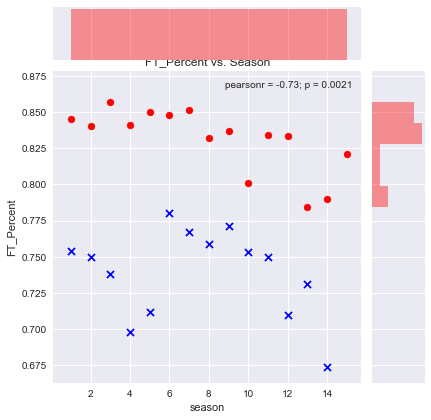

In [83]:
#Free Throw percentage per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.FT_Percent, color='r')
graph.x = df_lj.season
graph.y = df_lj.FT_Percent
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("FT_Percent vs. Season")
plt.show()
plt.gcf().clear()

### Jordan beats Lebron in Free Throw %

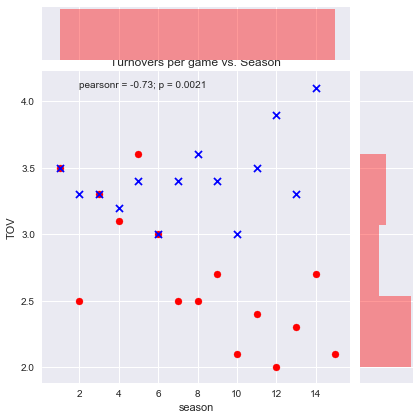

In [84]:
#Turnovers per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.TOV, color='r')
graph.x = df_lj.season
graph.y = df_lj.TOV
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Turnovers per game vs. Season")
plt.show()
plt.gcf().clear()

### Lebron consistenly has more turnovers per game than Jordan

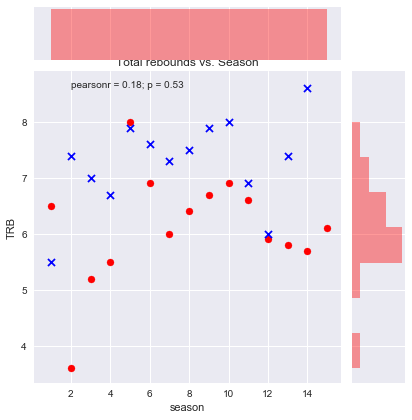

In [85]:
#Total Rebounds per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.TRB, color='r')
graph.x = df_lj.season
graph.y = df_lj.TRB
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Total rebounds vs. Season")
plt.show()
plt.gcf().clear()

### Lebron gets more rebounds per game than Jordan

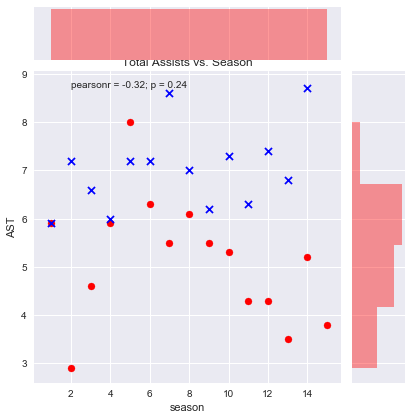

In [86]:
#Total Assists per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.AST, color='r')
graph.x = df_lj.season
graph.y = df_lj.AST
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Total Assists vs. Season")
plt.show()
plt.gcf().clear()

### Lebron gets more assists than Jordan per game

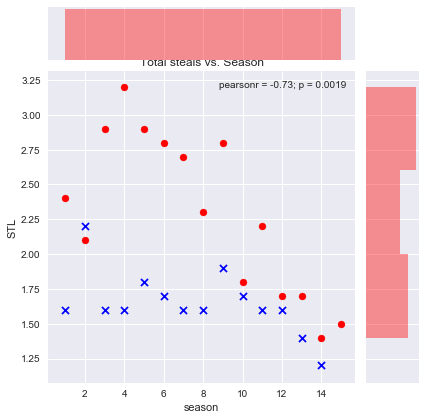

In [89]:
#Total steals per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.STL, color='r')
graph.x = df_lj.season
graph.y = df_lj.STL
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Total steals vs. Season")
plt.show()
plt.gcf().clear()

### Jordan has more steals per game than Lebron

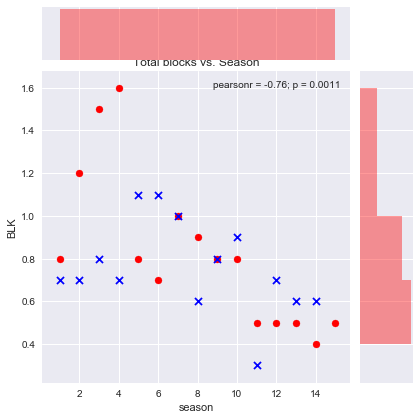

In [90]:
# Total blocks per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.BLK, color='r')
graph.x = df_lj.season
graph.y = df_lj.BLK
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Total blocks vs. Season")
plt.show()
plt.gcf().clear()

### Lebron and Jordan are tied when it comes to blocks per game

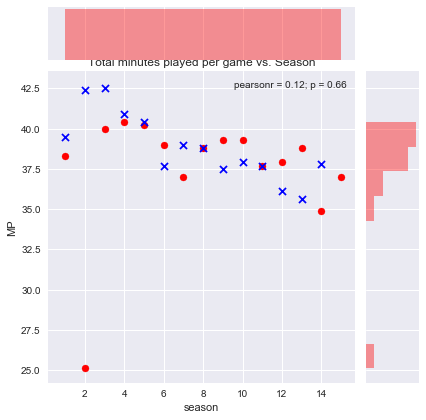

In [92]:
# Total minutes played per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.MP, color='r')
graph.x = df_lj.season
graph.y = df_lj.MP
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Total minutes played per game vs. Season")
plt.show()
plt.gcf().clear()

### Lebron plays more minutes per game than Jordan

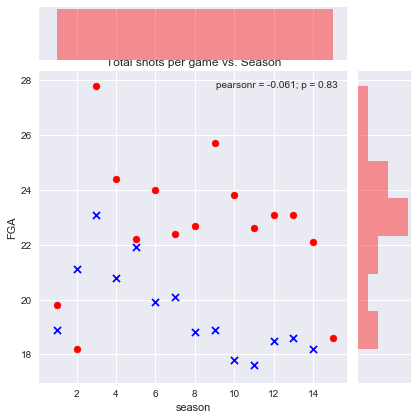

In [93]:
# Total shots per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.FGA, color='r')
graph.x = df_lj.season
graph.y = df_lj.FGA
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title("Total shots per game vs. Season")
plt.show()
plt.gcf().clear()

### Jordan has more shots per game than Lebron

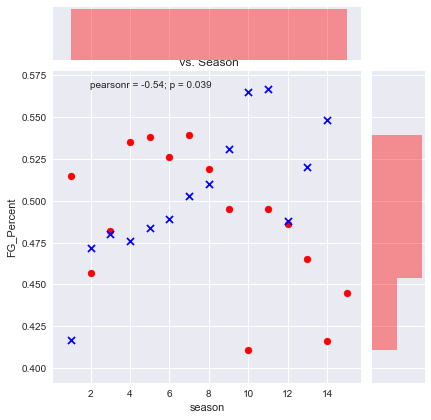

In [94]:
# Total Shot percentage per game
graph = sb.jointplot(x=df_mj.season, y=df_mj.FG_Percent, color='r')
graph.x = df_lj.season
graph.y = df_lj.FG_Percent
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title(" vs. Season")
plt.show()
plt.gcf().clear()

### However, Lebron continues to make more shots per game each season, showing a continual rate of improvement compare to Jordan's decline of accuracy. This is displayed by his increasing FG-Percentage each season

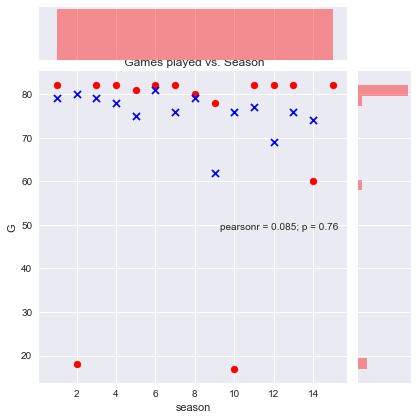

In [95]:
# Total games per season
graph = sb.jointplot(x=df_mj.season, y=df_mj.G, color='r')
graph.x = df_lj.season
graph.y = df_lj.G
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title(" Games played vs. Season")
plt.show()
plt.gcf().clear()

### Jordan consistently played in more games than Lebron

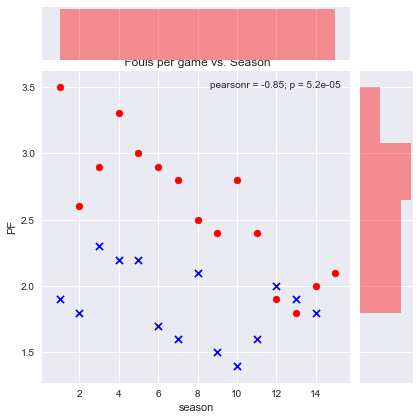

In [96]:
# Total games per season
graph = sb.jointplot(x=df_mj.season, y=df_mj.PF, color='r')
graph.x = df_lj.season
graph.y = df_lj.PF
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.title(" Fouls per game vs. Season")
plt.show()
plt.gcf().clear()

### Jordan committed more fouls per game than Lebron

# SUMMARY OF RESULTS

### Lebron is a better individual player then Micheal Jordan

When it comes to individual statistics, as shown above, Lebron is a better individual player when compared to Micheal Jordan.

### However, Micheal Jordan is still a better team player and has a greater legacy than Lebron (at this point in time)
is undefeated record in the NBA finals with 6 rings with the Chicago Bulls. And when it comes to overall greatness, it is best defined by wins of the TEAM and the TEAM's performance in the NBA finals. Lebron is curently 3-5 in the NBA finals while Jordan went 6-0. The ability for an NBA team to work together and play to each others strengths to win games is the defining characteristic of championship NBA teams. Lebron may be the best individual player statistics-wise to play the game above Micheal Jordan, but Lebron's team performance in the post season (which is ultimately how players are judged and ranked) still doesn't compare to the legacy set by Jordan.